In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# 导入文件

 - 设置index

In [2]:
df = pd.read_csv('./exp3.csv')
df.set_index('index',drop=True)

,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,team1_firstRiftHerald,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
index,,,,,,,,,,,,,,,,,,,,,
0,420,11,13,0,True,False,False,False,False,False,...,6967,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE
1,420,11,13,1,False,True,True,False,True,True,...,8133,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM
2,420,11,13,0,False,True,False,False,True,True,...,11868,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP
3,420,11,13,0,True,False,False,False,True,False,...,6703,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP
4,420,11,13,1,True,True,True,False,False,True,...,6823,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,420,11,13,0,False,False,False,False,False,False,...,10136,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM
79996,420,11,13,1,True,True,True,True,False,True,...,9411,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE
79997,420,11,13,0,True,False,False,False,False,False,...,11107,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE


 - 观察数据的列属性

In [3]:
df.columns

Index(['index', 'queueId', 'mapId', 'seasonId', 'team1_win',
       'team1_firstBlood', 'team1_firstTower', 'team1_firstInhibitor',
       'team1_firstBaron', 'team1_firstDragon', 'team1_firstRiftHerald',
       'player1_championId', 'player1_kills', 'player1_deaths',
       'player1_assists', 'player1_goldEarned', 'player1_role', 'player1_lane',
       'player2_championId', 'player2_kills', 'player2_deaths',
       'player2_assists', 'player2_goldEarned', 'player2_role', 'player2_lane',
       'player3_championId', 'player3_kills', 'player3_deaths',
       'player3_assists', 'player3_goldEarned', 'player3_role', 'player3_lane',
       'player4_championId', 'player4_kills', 'player4_deaths',
       'player4_assists', 'player4_goldEarned', 'player4_role', 'player4_lane',
       'player5_championId', 'player5_kills', 'player5_deaths',
       'player5_assists', 'player5_goldEarned', 'player5_role', 'player5_lane',
       'player6_championId', 'player6_kills', 'player6_deaths',
       'pla

 - 查询是否有非空值 ——并没有

In [4]:
df.loc[df.isnull().any(axis=1)]

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane


 - 查询不同列的取值个数

In [5]:
for index in df.columns[:18]:
    print(index+'   '+str(len(dict(df[index].value_counts()))))

index   80000
queueId   7
mapId   2
seasonId   1
team1_win   2
team1_firstBlood   2
team1_firstTower   2
team1_firstInhibitor   2
team1_firstBaron   2
team1_firstDragon   2
team1_firstRiftHerald   2
player1_championId   148
player1_kills   38
player1_deaths   28
player1_assists   54
player1_goldEarned   16374
player1_role   5
player1_lane   5


 - 获知mapid只有两种取值
     - 分别对两种取值进行统计
     - count(map1)>>count(map2)
     - 决定只对map1进行分析

Text(0.5, 1.0, 'the map distribution')

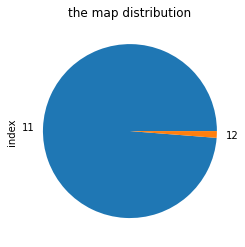

In [6]:
df.groupby('mapId').count()['index'].plot.pie()
plt.title('the map distribution')

In [7]:
df_map1=df.loc[df['mapId']==11]
df_map1

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
0,0,420,11,13,0,True,False,False,False,False,...,6967,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE
1,1,420,11,13,1,False,True,True,False,True,...,8133,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM
2,2,420,11,13,0,False,True,False,False,True,...,11868,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP
3,3,420,11,13,0,True,False,False,False,True,...,6703,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP
4,4,420,11,13,1,True,True,True,False,False,...,6823,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,420,11,13,0,False,False,False,False,False,...,10136,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM
79996,79996,420,11,13,1,True,True,True,True,False,...,9411,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE
79997,79997,420,11,13,0,True,False,False,False,False,...,11107,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE
79998,79998,420,11,13,0,False,False,False,False,True,...,7845,DUO_CARRY,BOTTOM,412,1,3,6,5607,DUO_SUPPORT,BOTTOM


In [8]:
df_map1.groupby('queueId').mean()['team1_win']

queueId
420     0.492801
430     0.465277
440     0.380478
700     0.544333
900     0.494624
1020    0.433594
Name: team1_win, dtype: float64

# 数据分析

## 单个特征的分布

 - player_goldEarned的分布（以player1为例）
 - player_kills的分布（以player1为例）
 - player_deaths的分布（以player1为例）
 - player_assists的分布（以player1为例）
 - player_championId的分布（以player1为例）


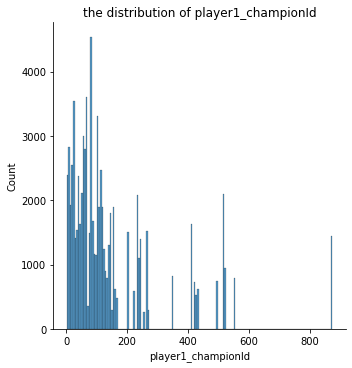

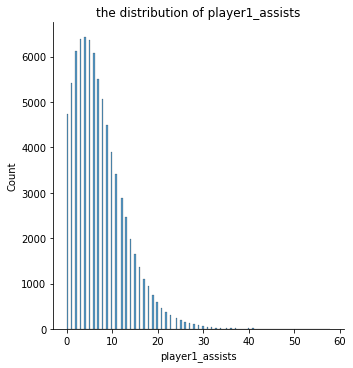

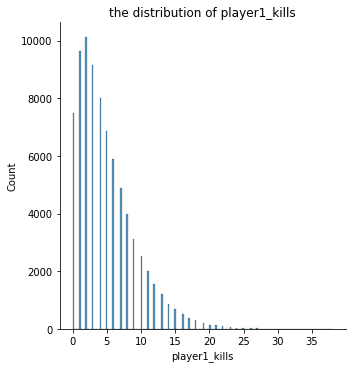

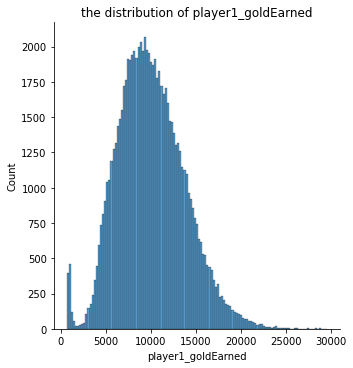

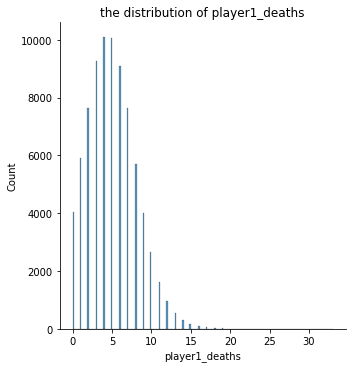

In [9]:
name_list=['championId','assists','kills','goldEarned','deaths']
i=0
for name in name_list:
    i+=1
    name='player1_'+name
    sns.displot(df[name])
    plt.xlabel(name)
    plt.title('the distribution of '+name)

## 异常值分析
- 最后并没有采用异常值处理后的数据进行分析

- 以player1_goldEarned 为例
    - 箱型图分析
    - 正态拟合分析

Text(0.5, 1.0, 'distribution of player1_goldEarned')

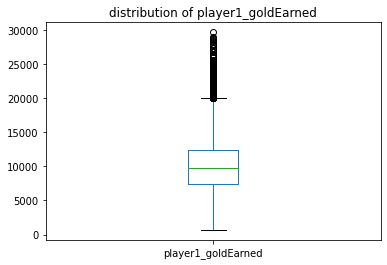

In [10]:
df_map1['player1_goldEarned'].plot(kind='box')
plt.title('distribution of player1_goldEarned')

- 离群值较多，不易分析，采用正态拟合尝试
    - 3*sigma 离群值舍弃

In [11]:
nname='player{}_goldEarned'
# fig=plt.figure()
name=nname.format(str(1))
u =np.mean(df[name])
sig =np.std(df[name])
outrange_list=list(df.loc[(df[name]>(u+3*sig))|(df[name]<(u-3*sig))]['index'])
df_new=df.drop(outrange_list,axis=0)
df_new

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
0,0,420,11,13,0,True,False,False,False,False,...,6967,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE
1,1,420,11,13,1,False,True,True,False,True,...,8133,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM
2,2,420,11,13,0,False,True,False,False,True,...,11868,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP
3,3,420,11,13,0,True,False,False,False,True,...,6703,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP
4,4,420,11,13,1,True,True,True,False,False,...,6823,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,420,11,13,0,False,False,False,False,False,...,10136,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM
79996,79996,420,11,13,1,True,True,True,True,False,...,9411,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE
79997,79997,420,11,13,0,True,False,False,False,False,...,11107,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE
79998,79998,420,11,13,0,False,False,False,False,True,...,7845,DUO_CARRY,BOTTOM,412,1,3,6,5607,DUO_SUPPORT,BOTTOM


## 特征间的关系

#### 与胜率之间的相关性(以player1为例)
 - Pearson 相关性
     - 可以看出team1_firstInhibitor与胜率相关性最大

Text(0.5, 1.0, 'the correlation with team1_win')

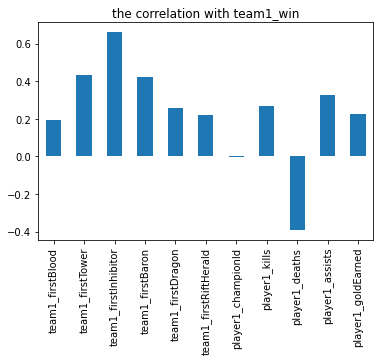

In [12]:
method_list=['pearson']
#              ,'kendall','spearman']
for method in method_list:
    df_corr=df.corr(method=method)
    df_corr.loc['team1_win'][5:16].plot.bar()
plt.title('the correlation with team1_win')

#### player属性内部的相关性（以player1为例）
- 可以看出player内部kills与goldEarned的相关性最高

In [13]:
player_corr_df=df_corr.iloc[11:16,11:16]
player_corr_df
# player_corr_ser=player_corr_df.iloc[0][1:]
# player_corr_ser.plot.bar()
player_corr_df=player_corr_df.replace(1,np.nan)
print(player_corr_df.max(),player_corr_df.min())
player_corr_df

player1_championId    0.034845
player1_kills         0.779798
player1_deaths        0.288500
player1_assists       0.383657
player1_goldEarned    0.779798
dtype: float64 player1_championId   -0.053181
player1_kills        -0.037501
player1_deaths        0.018510
player1_assists       0.034845
player1_goldEarned   -0.053181
dtype: float64


,player1_championId,player1_kills,player1_deaths,player1_assists,player1_goldEarned
player1_championId,NaN,-0.037501,0.018510,0.034845,-0.053181
player1_kills,-0.037501,NaN,0.123403,0.189374,0.779798
player1_deaths,0.018510,0.123403,NaN,0.197157,0.288500
player1_assists,0.034845,0.189374,0.197157,NaN,0.383657
player1_goldEarned,-0.053181,0.779798,0.288500,0.383657,NaN


#### 不同player之间的相关性
- 以goldEarned为例
    - 竟然发现不同player的经济是正相关的，不分队伍，震惊！

In [14]:
list_num=range(15,61,5)
dif_player_corr_df=df_corr.iloc[list_num,list_num]
dif_player_corr_df=dif_player_corr_df.replace(1,np.nan)
dif_player_corr_df

,player1_goldEarned,player2_goldEarned,player3_goldEarned,player4_goldEarned,player5_goldEarned,player6_goldEarned,player7_goldEarned,player8_goldEarned,player9_goldEarned,player10_goldEarned
player1_goldEarned,NaN,0.613010,0.622110,0.623688,0.626577,0.565356,0.561295,0.563508,0.560430,0.561242
player2_goldEarned,0.613010,NaN,0.616243,0.622493,0.626253,0.561433,0.560658,0.560356,0.557590,0.561196
player3_goldEarned,0.622110,0.616243,NaN,0.618477,0.626184,0.564935,0.558466,0.557230,0.558118,0.561624
player4_goldEarned,0.623688,0.622493,0.618477,NaN,0.617865,0.562033,0.558811,0.560590,0.557870,0.563684
player5_goldEarned,0.626577,0.626253,0.626184,0.617865,NaN,0.565958,0.562763,0.563330,0.561365,0.565403
player6_goldEarned,0.565356,0.561433,0.564935,0.562033,0.565958,NaN,0.614277,0.621661,0.617099,0.623349
player7_goldEarned,0.561295,0.560658,0.558466,0.558811,0.562763,0.614277,NaN,0.613124,0.613692,0.616244
player8_goldEarned,0.563508,0.560356,0.557230,0.560590,0.563330,0.621661,0.613124,NaN,0.610855,0.623165
player9_goldEarned,0.560430,0.557590,0.558118,0.557870,0.561365,0.617099,0.613692,0.610855,NaN,0.610994
player10_goldEarned,0.561242,0.561196,0.561624,0.563684,0.565403,0.623349,0.616244,0.623165,0.610994,NaN


## 特征与预测目标

#### ChampionID对胜率的影响
- 大致分布的散点图（仅player1）

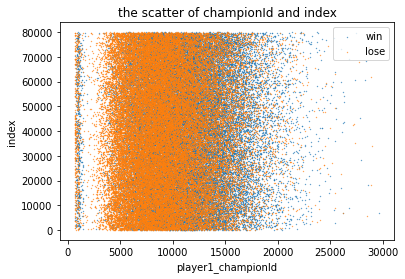

In [15]:
#画图
s_player1_win_id=df.loc[df['team1_win']==True]['player1_goldEarned']
s_player1_lose_id=df.loc[df['team1_win']==False]['player1_goldEarned']
s1=plt.scatter(s_player1_win_id,s_player1_win_id.index,s=0.1)
# plt.legend('win')
s2=plt.scatter(s_player1_lose_id,s_player1_lose_id.index,s=0.1)
plt.legend((s1,s2),('win','lose') ,loc = 'best')
plt.xlabel('player1_championId')
plt.ylabel('index')
plt.title('the scatter of championId and index')
plt.show()

#### 首先我们获得各个英雄的胜场次数

- 重点是对ChampionId进行分组
 - 前五个玩家：team1_win的求和即为各个英雄的胜场次数
  - 后五个玩家：team1_win==False的总数即为对应英雄的胜场次数

In [16]:
# 先得到各个英雄的胜场次数
champion_name='player{}_championId'
s1=df_map1.groupby('player1_championId').sum()['team1_win']
df_chamwin=pd.DataFrame([s1])
# 获得前五个玩家英雄的胜场数
for i in range(2,6):
    name=champion_name.format(str(i))
    s = df_map1.groupby(name).sum()['team1_win']
    df_chamwin = df_chamwin.append(s)
# 获得后五个玩家英雄的胜场数
for j in range(6,11):
    name=champion_name.format(str(i))
    # 先获得所有team1的败场数，即为Team2的胜场数
    df_temp=df_map1.loc[df_map1['team1_win']==False]
    s=df_temp.groupby(name).count()['team1_win']
    df_chamwin = df_chamwin.append(s)
s_chamwin=df_chamwin.sum()
# 再得到各个英雄的出场次数
champion_name='player{}_championId'
# 获得前五个玩家英雄的总出场次数
s3=df_map1.groupby('player1_championId').count()['team1_win']
df_chamall=pd.DataFrame([s3])
for i in range(2,11):
    name=champion_name.format(str(i))
    s = df_map1.groupby(name).count()['team1_win']
    df_chamall = df_chamall.append(s)
s_chamall=df_chamall.sum()
# 获得每一个英雄的胜率
s_chamwinpercent=s_chamwin/s_chamall

- 各个英雄胜率的统计图
 - 直方图
   - 胜率前30和后30位的ID分布
 - 箱图  
   - 不同英雄胜率的总体分布

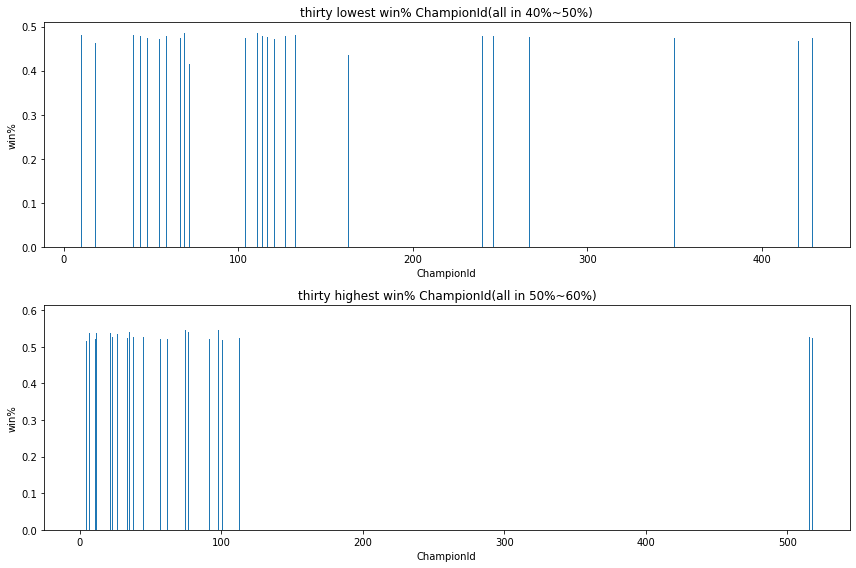

In [17]:
#进行排序
df_chamwimpercent=pd.DataFrame([s_chamwinpercent.index,s_chamwinpercent])
df_chamwimpercent=df_chamwimpercent.T
df_chamwimpercent=df_chamwimpercent.sort_values(by=1)
df_chamwimpercent2=df_chamwimpercent[:30]
df_chamwimpercent3=df_chamwimpercent[-31:]
#画图
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot(2,1,1)
fig1=plt.bar(list(df_chamwimpercent2[0]),list(df_chamwimpercent2[1]),width=0.5)
plt.xlabel("ChampionId")
plt.ylabel("win%")
plt.title("thirty lowest win% ChampionId(all in 40%~50%)")
ax1=plt.subplot(2,1,2)
fig2=plt.bar(list(df_chamwimpercent3[0]),list(df_chamwimpercent3[1]),width=0.5)
# ax.set_xlabel='Champion ID'
plt.xlabel("ChampionId")
plt.ylabel("win%")
plt.title("thirty highest win% ChampionId(all in 50%~60%)")
plt.tight_layout()
plt.show()

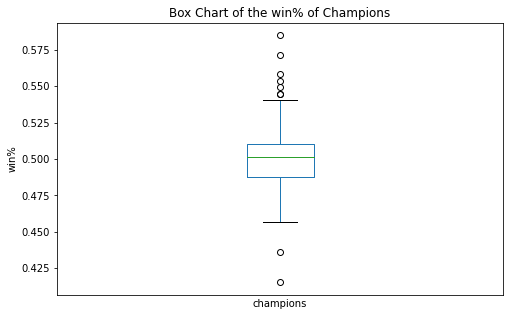

In [18]:
s_chamwinpercent.values.sort()
fig=plt.figure(figsize=(8,5))
ax=s_chamwinpercent.plot(kind='box')
ax.set_title("Box Chart of the win% of Champions")
plt.xticks([])
ax.set_xlabel('champions')
ax.set_ylabel('win%')
plt.show()

#### player_lane(player_role) 对胜率的影响

- 先大致了解player_lane的分布情况
  - 仅对team1进行了初步分析

Text(0.5, 1.0, 'distribution of player_lane in team1')

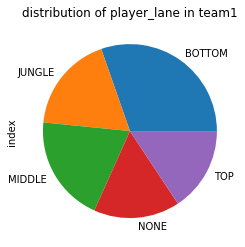

In [19]:
df2=df_map1
name='player{}_lane'
# ser=pd.Series([])
ser=df2.groupby(['player1_lane']).count()['index']
for i in range(2,6):
    player_name=name.format(str(i))
    ser+=df2.groupby([player_name]).count()['index']
# ser=df2.groupby(['player1_lane']).count()['index']
# df.groupby('player10_lane').count()['index'].plot.pie()
# df2
ser=df2.groupby(['player1_lane']).count()['index']+df2.groupby(['player2_lane']).count()['index']+df2.groupby(['player3_lane']).count()['index']+df2.groupby(['player4_lane']).count()['index']+df2.groupby(['player5_lane']).count()['index']
ser.plot.pie()
plt.title('distribution of player_lane in team1')

#### player_lane对胜率的影响
- 采用map方法获取不同lane组合

In [20]:
df3=df2.copy()
dic={'BOTTOM':10000,"JUNGLE":1000,'MIDDLE':1000,'NONE':10,'TOP':1}
df3['team1_type']=df3['player1_lane'].map(dic)+df3['player2_lane'].map(dic)+df3['player3_lane'].map(dic)\
                    +df3['player4_lane'].map(dic)+df3['player5_lane'].map(dic)
df3

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane,team1_type
0,0,420,11,13,0,True,False,False,False,False,...,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE,50
1,1,420,11,13,1,False,True,True,False,True,...,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM,22001
2,2,420,11,13,0,False,True,False,False,True,...,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP,22001
3,3,420,11,13,0,True,False,False,False,True,...,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP,22001
4,4,420,11,13,1,True,True,True,False,False,...,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM,22001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,420,11,13,0,False,False,False,False,False,...,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM,22001
79996,79996,420,11,13,1,True,True,True,True,False,...,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE,22001
79997,79997,420,11,13,0,True,False,False,False,False,...,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE,22001
79998,79998,420,11,13,0,False,False,False,False,True,...,DUO_CARRY,BOTTOM,412,1,3,6,5607,DUO_SUPPORT,BOTTOM,22001


- 不同组合的饼图
    - 其中第一位表示BOTTOM的数目，而后表示JUNGLE,MIDDLE,NONE,TOP的数目
    - 0略去不表

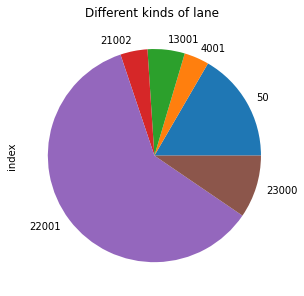

In [21]:
s2_count=df3.groupby('team1_type').count()['index']
s3=s2_count.where(s2_count>1000)
s3.dropna(inplace=True)
s3.plot.pie()
plt.tight_layout()
plt.title("Different kinds of lane ")
plt.legend
plt.show()

- 不同lane的组合方式的胜率直方图
    - 神奇的发现，可能五个打野的胜率高一点

Text(0.5, 1.0, 'the win% of different team1_type')

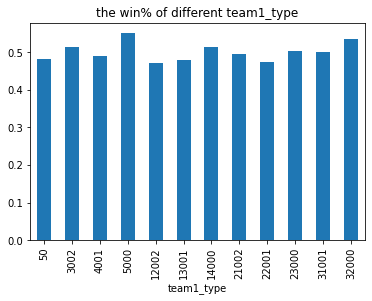

In [22]:
s2_1=df3.groupby('team1_type').count()['team1_win']
s2_1_1=s2_1.where(s2_1>200)
s2nulllist=s2_1_1[s2_1_1.isnull()].index

s2_1.drop(s2nulllist,inplace=True)
s2_2=df3.groupby('team1_type').sum()['team1_win']
s2_2.drop(s2nulllist,inplace=True)
s2_3=s2_2/s2_1
s2_3.plot.bar()
plt.title('the win% of different team1_type')

#### 考察总经济对胜率的影响

In [23]:
copy_df=df.copy()
copy_df['gold_all']=df2['player1_goldEarned']+df2['player2_goldEarned']+df2['player3_goldEarned']+df2['player4_goldEarned']+df2['player5_goldEarned']
copy_df

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane,gold_all
0,0,420,11,13,0,True,False,False,False,False,...,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE,26720.0
1,1,420,11,13,1,False,True,True,False,True,...,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM,52413.0
2,2,420,11,13,0,False,True,False,False,True,...,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP,51296.0
3,3,420,11,13,0,True,False,False,False,True,...,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP,47192.0
4,4,420,11,13,1,True,True,True,False,False,...,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM,48454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,420,11,13,0,False,False,False,False,False,...,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM,38322.0
79996,79996,420,11,13,1,True,True,True,True,False,...,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE,51210.0
79997,79997,420,11,13,0,True,False,False,False,False,...,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE,39705.0
79998,79998,420,11,13,0,False,False,False,False,True,...,DUO_CARRY,BOTTOM,412,1,3,6,5607,DUO_SUPPORT,BOTTOM,32257.0


- 画出不同经济与胜率之间的关系图
    - 看出明显的正相关关系
    - 当经济大于100000时，几乎必赢

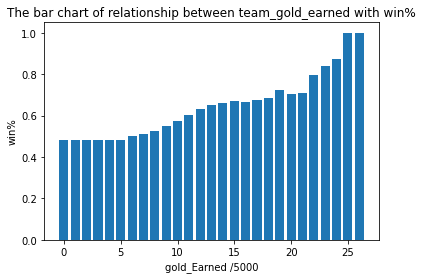

In [24]:
num_gold_min=copy_df['gold_all'].min()
num_gold_max=copy_df['gold_all'].max()
num_gold_times=5000
s_win_per_lists=[]
for i in range(int(num_gold_min/num_gold_times)-1,int(num_gold_max/num_gold_times)+1):
    num=i*num_gold_times
    s_gold_win=copy_df.loc[copy_df['gold_all']>num]['team1_win'].sum()
    s_gold_all=copy_df.loc[copy_df['gold_all']>num]['team1_win'].count()
    s_win_per_lists.append(s_gold_win/s_gold_all)
# s_win_per_lists
# plt.scatter(range(len(s_win_per_lists)),s_win_per_lists)
plt.bar(range(len(s_win_per_lists)),s_win_per_lists)
plt.xlabel('gold_Earned /5000')
plt.ylabel('win%')
plt.title('The bar chart of relationship between team_gold_earned with win%')
plt.show()

# 特征提取

## 特征变换
#### str -> int

In [25]:
#将player10的str数据转换为int格式
copy_df_2=df.copy()
for col in df.columns[-6:]:
    if(type(df[col][0])==str):
#         print(col)
        unique_list=df[col].unique()
        def convert(item):
            return np.argwhere(unique_list==item)[0,0]
        copy_df_2[col]=copy_df_2[col].map(convert)
df_player10=copy_df_2.iloc[:,-7:]
df_player10

,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
0,157,3,0,8,8168,0,0
1,555,3,7,4,6943,1,1
2,122,2,2,1,9685,2,2
3,23,6,2,10,13109,2,2
4,25,5,7,8,6809,1,1
...,...,...,...,...,...,...,...
79995,235,3,5,13,8540,1,1
79996,157,0,7,4,8248,2,4
79997,7,10,2,13,11401,0,4
79998,412,1,3,6,5607,1,1


- 获得player10的各项数据之间的相关系数
    - int化的player10_role和player10_lane与其余值的相关性都不大

In [26]:
df_player10.corr()

,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
player10_championId,1.000000,-0.035441,0.013209,0.031406,-0.055653,-0.093295,-0.101081
player10_kills,-0.035441,1.000000,0.123002,0.183538,0.777997,0.246381,0.262983
player10_deaths,0.013209,0.123002,1.000000,0.204596,0.291811,0.120216,0.170965
player10_assists,0.031406,0.183538,0.204596,1.000000,0.376449,0.047259,0.059902
player10_goldEarned,-0.055653,0.777997,0.291811,0.376449,1.000000,0.371361,0.412811
player10_role,-0.093295,0.246381,0.120216,0.047259,0.371361,1.000000,0.391563
player10_lane,-0.101081,0.262983,0.170965,0.059902,0.412811,0.391563,1.000000


- 下面获取player1~5之间str值的相关性
    - 可以看出不同player间的lane和role的相关性也不高
    - player1_role和player1_lane间的相关性最高

In [27]:
#将player1~5的str数据转换为int格式
col_str_to_int_list=[]
copy_df_2=df.copy()
for col in df.columns[:46]:
    if(type(df[col][0])==str):
#         print(col)
        col_str_to_int_list.append(col)
        unique_list=df[col].unique()
        def convert(item):
            return np.argwhere(unique_list==item)[0,0]
        copy_df_2[col]=copy_df_2[col].map(convert)

In [28]:
df_player_1_to_5=copy_df_2.loc[:,list(col_str_to_int_list)]
df_player_1_to_5_corr=df_player_1_to_5.corr()
df_player_1_to_5_corr.replace(1,np.nan,inplace=True)
df_player_1_to_5_corr

,player1_role,player1_lane,player2_role,player2_lane,player3_role,player3_lane,player4_role,player4_lane,player5_role,player5_lane
player1_role,NaN,0.615789,0.179718,0.217623,0.137106,0.175612,0.138272,0.167722,0.151462,0.275260
player1_lane,0.615789,NaN,0.236930,0.467375,0.245108,0.460998,0.201481,0.444554,0.196661,0.516389
player2_role,0.179718,0.236930,NaN,0.268557,0.059390,0.101348,0.114742,0.066996,0.132915,0.227174
player2_lane,0.217623,0.467375,0.268557,NaN,0.213119,0.394880,0.138080,0.339152,0.162821,0.559824
player3_role,0.137106,0.245108,0.059390,0.213119,NaN,0.183238,0.139727,0.198872,0.053458,0.199259
player3_lane,0.175612,0.460998,0.101348,0.394880,0.183238,NaN,0.107149,0.292356,0.141423,0.523685
player4_role,0.138272,0.201481,0.114742,0.138080,0.139727,0.107149,NaN,0.657605,0.156823,0.249596
player4_lane,0.167722,0.444554,0.066996,0.339152,0.198872,0.292356,0.657605,NaN,0.144328,0.499641
player5_role,0.151462,0.196661,0.132915,0.162821,0.053458,0.141423,0.156823,0.144328,NaN,0.162148
player5_lane,0.275260,0.516389,0.227174,0.559824,0.199259,0.523685,0.249596,0.499641,0.162148,NaN


#### 取log
- 以player1的各个数字特征为例

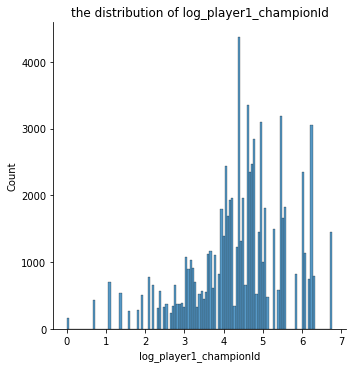

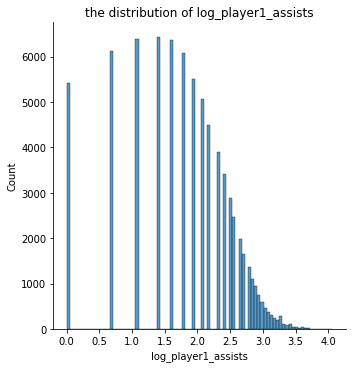

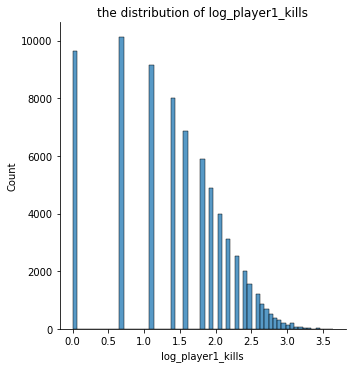

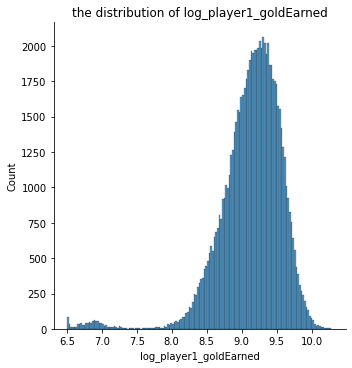

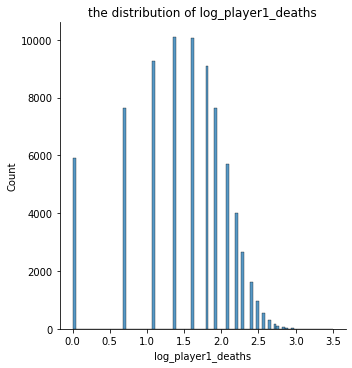

In [29]:
copy_df_3=df.copy()
name_list=['championId','assists','kills','goldEarned','deaths']
for name in name_list:
    name='player1_'+name
    log_name='log_'+name
    copy_df_3[name].replace(0,np.nan,inplace=True)
    copy_df_3[log_name]=np.log(copy_df_3[name])
    sns.displot(copy_df_3[log_name])
    plt.title('the distribution of '+log_name)

## 组合特征

- 两队的经济差

In [30]:
# 建立新的一列-经济差
copy_df_4=df.copy()
copy_df_4['goldminus']=0
name='goldEarned'
for i in range(1,6):
    full_name='player'+str(i)+'_'+name
    copy_df_4['goldminus']+=copy_df_4[full_name]
for i in range(6,11):
    full_name='player'+str(i)+'_'+name
    copy_df_4['goldminus']-=copy_df_4[full_name]

- 画图查看大致趋势
    - 可以明显看到分类聚集的现象
    - 分类面大致为goldminus=0

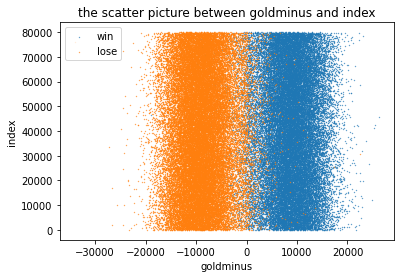

In [31]:
s_minus_win=copy_df_4.loc[df['team1_win']==True]['goldminus']
s_minus_lose=copy_df_4.loc[df['team1_win']==False]['goldminus']
s1=plt.scatter(s_minus_win,s_minus_win.index,s=0.1)
# plt.legend('win')
s2=plt.scatter(s_minus_lose,s_minus_lose.index,s=0.1)
plt.legend((s1,s2),('win','lose') ,loc = 'best')
plt.xlabel('goldminus')
plt.ylabel('index')
plt.title('the scatter picture between goldminus and index')
plt.show()

- 调用knn算法简单模拟
    - 看出仅通过两队经济差来判断胜负，就有97%的准确率！

In [32]:
x=copy_df_4.loc[:,['index','goldminus']]
y=copy_df_4.loc[:,'team1_win']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1000)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.977

- 尝试组合firstblood,firsttower,firstinhibitor

In [33]:
copy_df_5=df.copy()
copy_df_5['first_all']=0
dic1={True:100,False:0}
dic2={True:10,False:0}
dic3={True:1,False:0}
copy_df_5['first_all']=copy_df_5['team1_firstBlood'].map(dic1)+copy_df_5['team1_firstTower'].map(dic2)\
                        +copy_df_5['team1_firstInhibitor'].map(dic3)
dic4={0:0,1:1,10:2,11:3,100:4,101:5,110:6,111:7}
copy_df_5['first_all']=copy_df_5['first_all'].map(dic4)

Text(0.5, 1.0, 'the bar chart of between different first_all and win%')

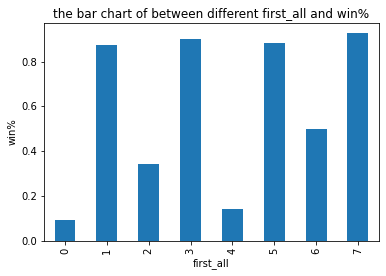

In [34]:
ser_first_all_win=copy_df_5.groupby('first_all').sum()['team1_win']
ser_first_all=copy_df_5.groupby('first_all').count()['team1_win']
ser_first_win_per=ser_first_all_win/ser_first_all
ser_first_win_per.plot.bar()
plt.ylabel('win%')
plt.title('the bar chart of between different first_all and win%')

- 三者的组合特征与胜率的相关性小于单纯的firstinhibiter相关性
    - 这个组合特征取的无效！
    - sad! sad! sad!

In [35]:
copy_df_5[['team1_win','team1_firstInhibitor','first_all']].corr()

,team1_win,team1_firstInhibitor,first_all
team1_win,1.000000,0.660634,0.438605
team1_firstInhibitor,0.660634,1.000000,0.433086
first_all,0.438605,0.433086,1.000000


In [36]:
df.columns

Index(['index', 'queueId', 'mapId', 'seasonId', 'team1_win',
       'team1_firstBlood', 'team1_firstTower', 'team1_firstInhibitor',
       'team1_firstBaron', 'team1_firstDragon', 'team1_firstRiftHerald',
       'player1_championId', 'player1_kills', 'player1_deaths',
       'player1_assists', 'player1_goldEarned', 'player1_role', 'player1_lane',
       'player2_championId', 'player2_kills', 'player2_deaths',
       'player2_assists', 'player2_goldEarned', 'player2_role', 'player2_lane',
       'player3_championId', 'player3_kills', 'player3_deaths',
       'player3_assists', 'player3_goldEarned', 'player3_role', 'player3_lane',
       'player4_championId', 'player4_kills', 'player4_deaths',
       'player4_assists', 'player4_goldEarned', 'player4_role', 'player4_lane',
       'player5_championId', 'player5_kills', 'player5_deaths',
       'player5_assists', 'player5_goldEarned', 'player5_role', 'player5_lane',
       'player6_championId', 'player6_kills', 'player6_deaths',
       'pla

## 特征聚集

#### 利用PCA实现数据降维
- 降维对象是team1除了team1_win的所有对象

In [37]:
from sklearn.decomposition import PCA

In [38]:
copy_df_6=df.copy()
copy_df_6=copy_df_6[['team1_firstBlood', 'team1_firstTower', 'team1_firstInhibitor',
       'team1_firstBaron', 'team1_firstDragon', 'team1_firstRiftHerald']]
pca=PCA(n_components=1)
pca.fit(copy_df_6)
array_pca=pca.transform(copy_df_6)
array_pca=array_pca[:,0]

In [39]:
ser_pca=pd.Series(array_pca)
df_pca=pd.DataFrame(list(zip(ser_pca,df['team1_win'])),columns=['pca','win'])
df_pca.corr()

,pca,win
pca,1.000000,0.633679
win,0.633679,1.000000


- 尝试对team1的kills,deaths,assists进行降维

In [40]:
copy_df_7=df.copy()
copy_df_7['kills_all']=copy_df_7['player1_kills']+copy_df_7['player2_kills']\
                        +copy_df_7['player3_kills']+copy_df_7['player4_kills']+copy_df_7['player5_kills']
# copy_df_7['deaths_all']=copy_df_7['player1_deaths']+copy_df_7['player2_deaths']\
#                         +copy_df_7['player3_deaths']+copy_df_7['player4_deaths']+copy_df_7['player5_deaths']
copy_df_7['assists_all']=copy_df_7['player1_assists']+copy_df_7['player2_assists']\
                        +copy_df_7['player3_assists']+copy_df_7['player4_assists']+copy_df_7['player5_assists']
kda_df=copy_df_7.loc[:,['kills_all','assists_all']]
#                      ,'deaths_all',]]
kda_df

,kills_all,assists_all
0,9,12
1,32,46
2,14,22
3,18,26
4,32,43
...,...,...
79995,13,16
79996,28,48
79997,16,34
79998,11,20


In [41]:
pca=PCA(n_components=1)
pca.fit(kda_df)
array_kda=pca.transform(kda_df)
array_kda=array_kda[:,0]

- 失败了！

In [42]:
df_kda_corr=pd.DataFrame(list(zip(array_kda,df['team1_win'])),columns=['pca_kda','win'])
df_kda_corr=df_kda_corr.corr()
df_kda_corr

,pca_kda,win
pca_kda,1.000000,0.431259
win,0.431259,1.000000


#### 利用featureagglomeration实现特征聚集
- 失败了！不用看了！

In [43]:
from sklearn import cluster
agglo=cluster.FeatureAgglomeration(n_clusters=1)
agglo.fit(kda_df)
array_agglo=agglo.transform(kda_df)
array_agglo=array_agglo[:,0]
array_agglo

array([10.5, 39. , 18. , ..., 25. , 15.5, 29. ])

In [44]:
df_agglo_corr=pd.DataFrame(list(zip(array_agglo,df['team1_win'])),columns=['agglo_kda','win'])
df_agglo_corr=df_agglo_corr.corr()
df_agglo_corr

,agglo_kda,win
agglo_kda,1.0000,0.4431
win,0.4431,1.0000


In [45]:
copy_df_7['gold_all_team1']=copy_df_7['player1_goldEarned']+copy_df_7['player2_goldEarned']\
                        +copy_df_7['player3_goldEarned']+copy_df_7['player4_goldEarned']+copy_df_7['player5_goldEarned']
copy_df_7['gold_all_team2']=copy_df_7['player8_goldEarned']+copy_df_7['player6_goldEarned']\
                        +copy_df_7['player7_goldEarned']+copy_df_7['player9_goldEarned']+copy_df_7['player10_goldEarned']
gold_df=copy_df_7.loc[:,['gold_all_team1','gold_all_team2']]
agglo.fit(gold_df)
array_agglo=agglo.transform(gold_df)
array_agglo=array_agglo[:,0]
array_agglo

array([31459.5, 46977. , 53463. , ..., 47379.5, 36454.5, 76698. ])

In [46]:
df_agglo_gold=pd.DataFrame(list(zip(array_agglo,df['team1_win'])),columns=['agglo_gold','win'])
df_agglo_gold.corr()

,agglo_gold,win
agglo_gold,1.00000,-0.00781
win,-0.00781,1.00000
